In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [5]:
weight = 0.42
bias = 0.17

start = 0
end = 1
step = 0.015

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0150],
         [0.0300],
         [0.0450],
         [0.0600],
         [0.0750],
         [0.0900],
         [0.1050],
         [0.1200],
         [0.1350]]),
 tensor([[0.1700],
         [0.1763],
         [0.1826],
         [0.1889],
         [0.1952],
         [0.2015],
         [0.2078],
         [0.2141],
         [0.2204],
         [0.2267]]))

In [6]:
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [8]:
def plot_predictions(train_data,
                    train_labels,
                    test_data,
                    test_labels,
                    predictions=None):
    plt.figure(figsize=(10, 7))
    
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")
    
    plt.scatter(test_data, test_labels, c="g", s=4, label="Test Data")
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
        
    plt.legend(prop={"size": 14})

In [11]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,
                                     out_features=1)
        
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)     

In [13]:
torch.manual_seed(42)
model = LinearRegressionModel()
model, model.state_dict()

(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [14]:
#Check model current device
next(model.parameters()).device

device(type='cpu')

In [15]:
#Set model to use target device
model.to(device)
next(model.parameters()).device

device(type='cpu')

In [20]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), 
                            lr=0.001)

torch.manual_seed(42)

epochs = 200

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):
    model.train()
    y_pred = model(X_train)    
    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_fn(test_pred, y_test)
    
    if epoch % 10 == 0:
        print(f'Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}')

Epoch: 0 | Loss: 0.004166799131780863 | Test Loss: 0.006715037859976292
Epoch: 10 | Loss: 0.0010040962370112538 | Test Loss: 0.0022843650076538324
Epoch: 20 | Loss: 0.0006647720001637936 | Test Loss: 0.0014868037542328238
Epoch: 30 | Loss: 0.0003254478215239942 | Test Loss: 0.0006892425590194762
Epoch: 40 | Loss: 0.0007329726358875632 | Test Loss: 0.0006777686649002135
Epoch: 50 | Loss: 0.0007329726358875632 | Test Loss: 0.0006777686649002135
Epoch: 60 | Loss: 0.0007329726358875632 | Test Loss: 0.0006777686649002135
Epoch: 70 | Loss: 0.0007329726358875632 | Test Loss: 0.0006777686649002135
Epoch: 80 | Loss: 0.0007329726358875632 | Test Loss: 0.0006777686649002135
Epoch: 90 | Loss: 0.0007329726358875632 | Test Loss: 0.0006777686649002135
Epoch: 100 | Loss: 0.0007329726358875632 | Test Loss: 0.0006777686649002135
Epoch: 110 | Loss: 0.0007329726358875632 | Test Loss: 0.0006777686649002135
Epoch: 120 | Loss: 0.0007329726358875632 | Test Loss: 0.0006777686649002135
Epoch: 130 | Loss: 0.0007

In [21]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.4201]])),
             ('linear_layer.bias', tensor([0.1692]))])

In [22]:
model.eval()
with torch.inference_mode():
    y_preds = model(X_test)

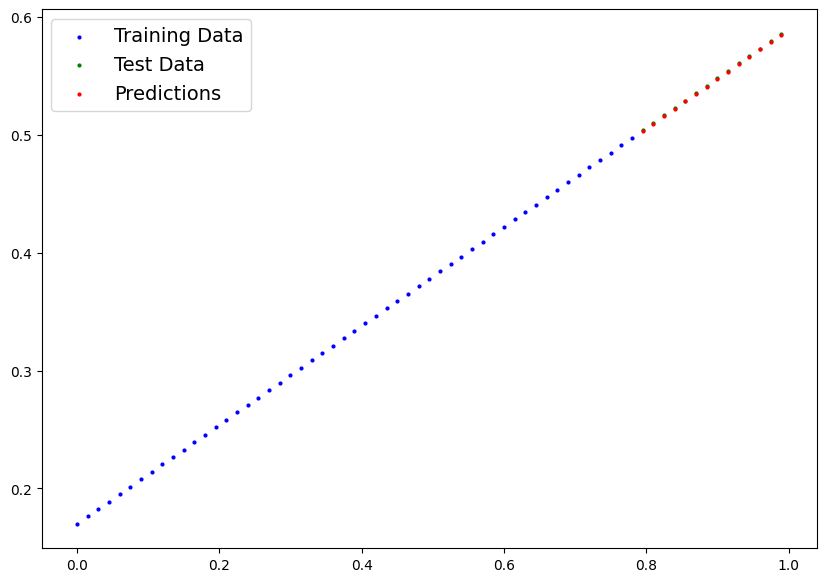

In [24]:
plot_predictions(X_train, y_train, X_test, y_test, predictions=y_preds)

In [25]:
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

In [26]:
torch.save(obj=model.state_dict(),f=MODEL_SAVE_PATH)

In [27]:
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [29]:
loaded_model.to(device)
loaded_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.4201]])),
             ('linear_layer.bias', tensor([0.1692]))])

In [32]:
loaded_model.eval()
with torch.inference_mode():
    y_pred_new = loaded_model(X_test)

y_pred_new == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])